# PCR and PLS Regression

## Principal Components Regression

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline

In [50]:
hitters = pd.read_csv('../../data/Hitters.csv', index_col=0).dropna()
hitters = pd.get_dummies(hitters, drop_first=True)

features = hitters.columns.drop('Salary')

X = hitters[features].values
y = hitters['Salary'].values

sc = StandardScaler()
X = sc.fit_transform(X)

/Users/tsansom/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
pca = PCA()
X_reduced = pca.fit_transform(X)
print(pca.n_samples_, pca.n_features_)
print(pca.get_params)

263 19
<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>


In [52]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

lr = LinearRegression()
mse = []

#get the mse for the intercept only first
score = -1 * cross_val_score(lr, np.ones((len(X_reduced), 1)), y, cv=kf, scoring='neg_mean_squared_error').mean()

mse.append(score)

for i in range(1, X.shape[1]+1):
    score = -1 * cross_val_score(lr, X_reduced[:, :i], y, cv=kf, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Intercept MSE: 203279.00372577633
1 comps MSE: 121376.64645611549
2 comps MSE: 120732.4638070473
3 comps MSE: 120292.04913927118
4 comps MSE: 118913.66143765594
5 comps MSE: 115970.71889619599
6 comps MSE: 115026.39976265137
7 comps MSE: 116213.5782866488
8 comps MSE: 118512.74956809582
9 comps MSE: 120350.94015445063
10 comps MSE: 120664.98190559338
11 comps MSE: 121319.6770123302
12 comps MSE: 122381.1966585969
13 comps MSE: 125623.73372270132
14 comps MSE: 119243.13279145033
15 comps MSE: 119751.9883116803
16 comps MSE: 112291.88532866663
17 comps MSE: 114071.5307385422
18 comps MSE: 114292.6339445409
19 comps MSE: 116281.23159408271


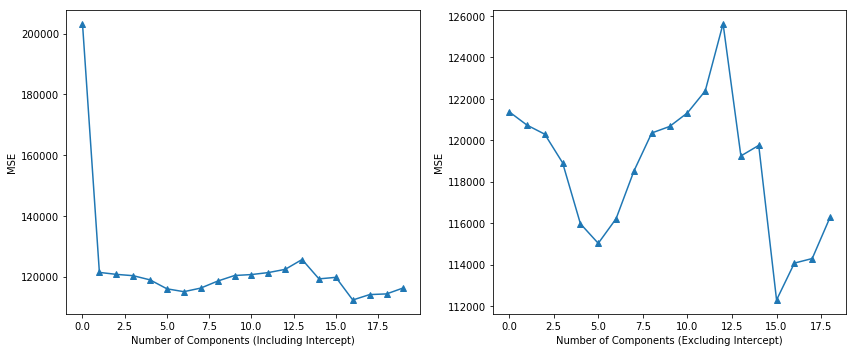

In [53]:
for i in range(X.shape[1]+1):
    if i == 0:
        print('Intercept MSE: {}'.format(mse[i]))
    else:
        print('{} comps MSE: {}'.format(i, mse[i]))
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(mse, marker='^')
ax1.set(xlabel='Number of Components (Including Intercept)', ylabel='MSE')
ax2.plot(mse[1:], marker='^')
ax2.set(xlabel='Number of Components (Excluding Intercept)', ylabel='MSE')

fig.tight_layout()

[<matplotlib.text.Text at 0x1164b3860>, <matplotlib.text.Text at 0x1155bb940>]

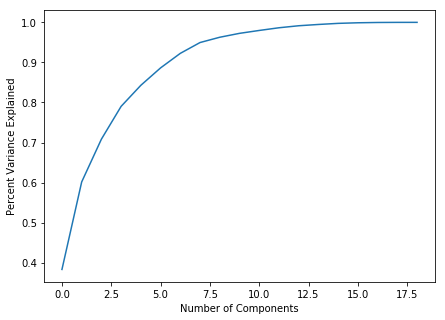

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Number of Components', ylabel='Percent Variance Explained')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

pca = PCA(n_components=7)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(np.cumsum(pca.explained_variance_ratio_))

lr = LinearRegression()
lr.fit(X_train_reduced, y_train)
y_pred = lr.predict(X_test_reduced)
print(mean_squared_error(y_pred, y_test))

[ 0.34698022  0.5566658   0.6844785   0.77279523  0.83496151  0.8798956
  0.9195376 ]
126172.096689


## Partial Least Squares

[<matplotlib.text.Text at 0x115a871d0>, <matplotlib.text.Text at 0x115cf5128>]

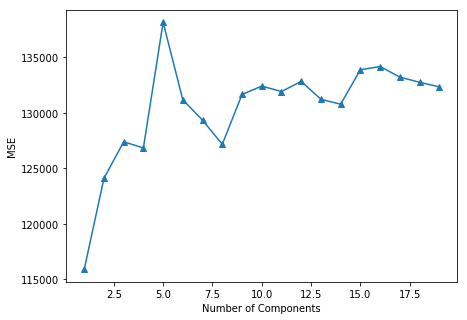

In [62]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in range(1, X.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = -1 * cross_val_score(pls, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(np.arange(1, 20), mse, marker='^')
ax.set(xlabel='Number of Components', ylabel='MSE')

In [71]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
print(mean_squared_error(pls.predict(X_test), y_test))

123556.236068
